In [64]:
from oopse2 import *
from astropy.io import fits
import numpy as np
from matplotlib import pyplot as plt

import seaborn as sns

sns.set(font="Times",style='ticks',context='talk',palette='pastel')

In [65]:
hdul = fits.open('/Users/samanthawong/pulsar_analysis/dgcvn.fits')
time = hdul[1].data['time2']
t2 = hdul[1].data['data2']
t3 = hdul[1].data['data3']
t4 = hdul[1].data['data4']

In [66]:
time2, t2 = timecuts('timecuts.txt',(time,t2))
time3, t3 = timecuts('timecuts.txt',(time,t3))
time4, t4 = timecuts('timecuts.txt',(time,t4))

In [67]:
p,diff = get_p("PSRJ2229+6114.eph",'2023-12-10',diff=True)
print(p,diff)

2024-05-15 14:08:43.714 | WARNING  | pint.models.model_builder:__call__:232 - UNITS is not specified. Assuming TDB...


19.35007537153781822 0.00022926902680178024019


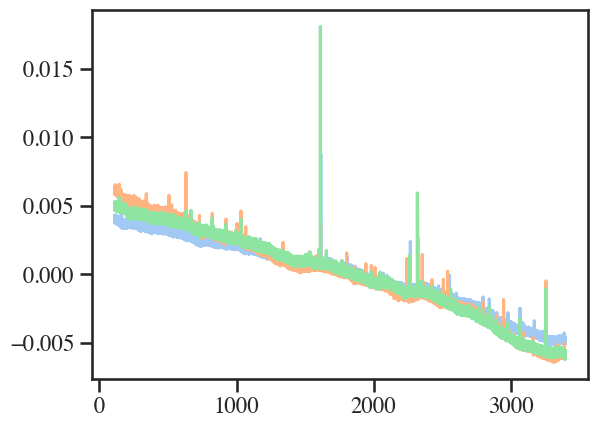

In [68]:
plt.plot(time2,t2)
plt.plot(time2,t3)
plt.plot(time2,t4)

In [69]:
t2_runs,chunk_times,chunk_spacing = chunk_data(50,60,t2,time2)
t3_runs,_,_ = chunk_data(50,60,t3,time2)
t4_runs,_,_ = chunk_data(50,60,t4,time2)

In [ ]:
for run in t3_runs:
    plt.plot(chunk_times,run[0])

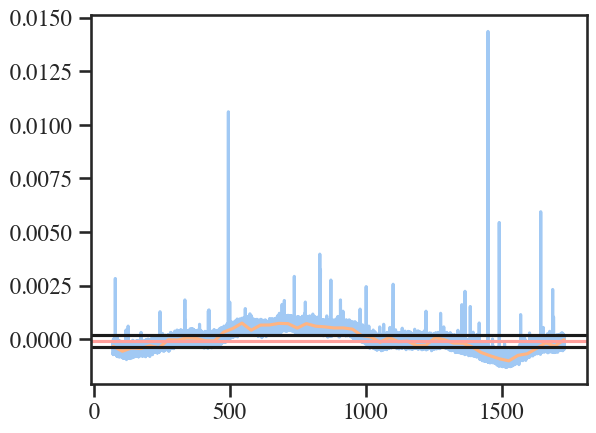

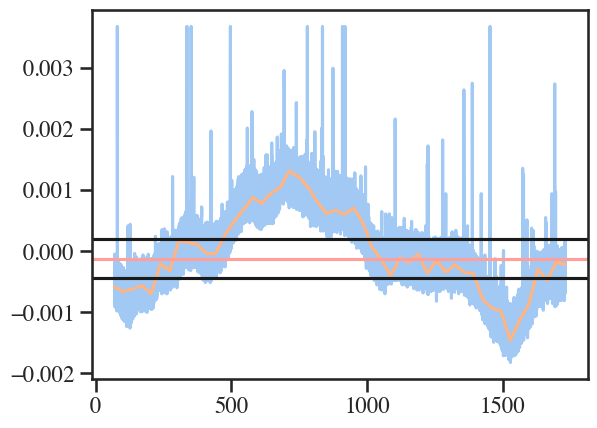

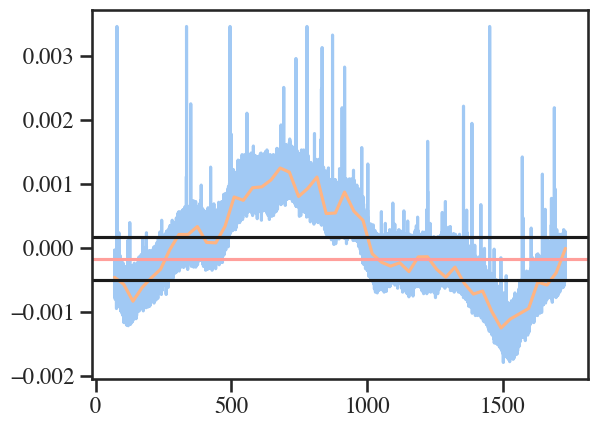

In [26]:
clean2 = clean_spl(time2,t2,10,50)
clean3 = clean_spl(time2,t3,10,50)
clean4 = clean_spl(time2,t4,10,50)

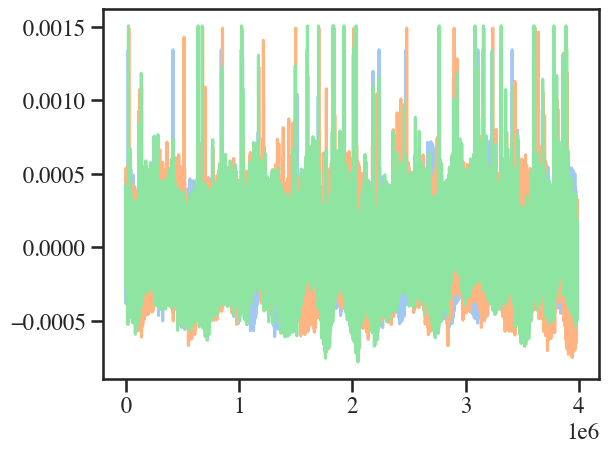

In [27]:
plt.plot(clean2)
plt.plot(clean3)
plt.plot(clean4)

In [70]:
spacing = get_spacing(2400,len(t2))
spacing

0.0003039514062755073

<Figure size 640x480 with 0 Axes>

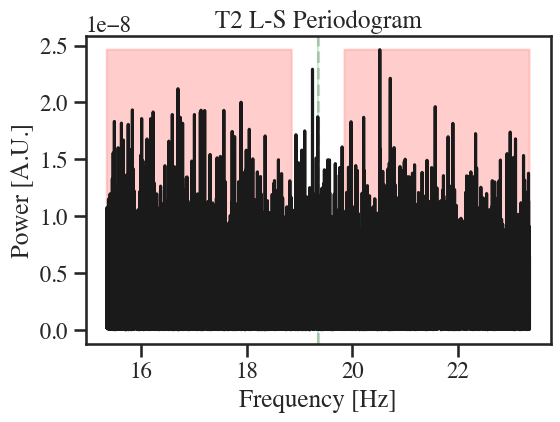

<Figure size 640x480 with 0 Axes>

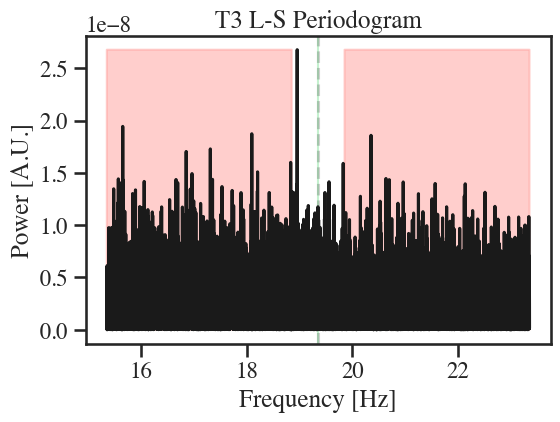

<Figure size 640x480 with 0 Axes>

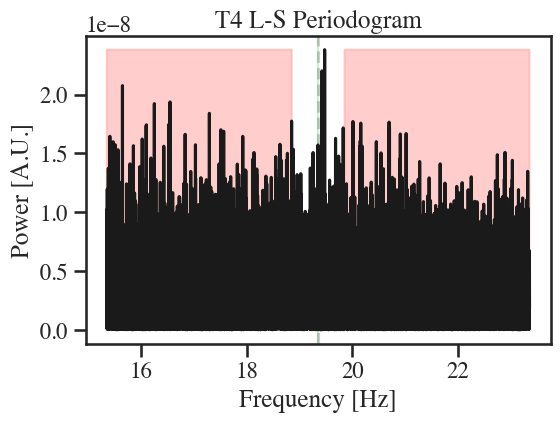

In [71]:
p2 = calc_p(time2,t2,p,2,spacing)
p3 = calc_p(time2,t3,p,3,spacing)
p4 = calc_p(time2,t4,p,4,spacing)

In [75]:
p2,p3,p4

(0.17481934750576827, 0.3968457794489874, 0.42640773779007357)

In [76]:
calc_sigma([p2,p3,p4])

0.4759372205134472

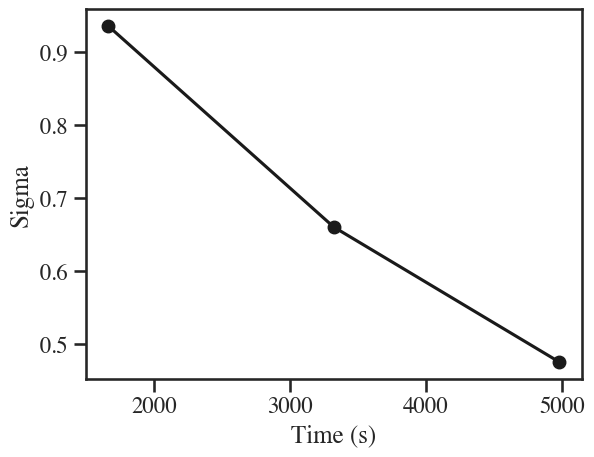

In [77]:
plot_cum_sig([p2,p3,p4],1660)